# MULTIPLE LINEAR REGRESSION MODEL

The procedure, according to data science best practice, is to follow these steps iteratively to progressively improve your model's performance:

- Data exploration and pre-processing: This includes data cleaning, handling missing values, and feature transformation (such as standardization or normalization) before any division into training and test sets.

- Separation of training and test sets: You have already performed this step.

- Linearity check and feature selection: Before training your first model, it's useful to analyze the relationships between the features and the target variable to understand what transformations might be necessary. This can include calculating correlation coefficients and visualizing the relationships between features and the target variable.

- Baseline training: This gives you a starting point for evaluating the effectiveness of your transformations and other adjustments.

- Feature transformation: Based on the initial analysis and the performance of your baseline model, you may decide to apply certain transformations to the features to improve the linearity of the relationship with the target.

- Baseline model training: This gives you a starting point for evaluating the effectiveness of your transformations and other adjustments.

- Feature transformation: Based on the initial analysis and the performance of your baseline model, you may decide to apply certain transformations to the features to improve the linearity of the relationship with the target.

- Re-calculate correlation coefficients: After transforming features, recalculate correlation coefficients to check whether relationships with the target variable have improved.

- Re-train and evaluate the model: With the characteristics transformed, re-train the model to assess the impact of the transformations on performance.

![diagram](data/multiple_linear_diagram.svg)

In [4]:
import ray
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
# Load data into a DataFrame
raw_df = pd.read_csv("./data/honey_purity_dataset.csv")

In [6]:
# Display the first few rows of the DataFrame
raw_df.head(5)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [7]:
# Display data types of the columns
raw_df.shape

(247903, 11)

In [8]:
# Display data types of the columns
raw_df.dtypes

CS                 float64
Density            float64
WC                 float64
pH                 float64
EC                 float64
F                  float64
G                  float64
Pollen_analysis     object
Viscosity          float64
Purity             float64
Price              float64
dtype: object

In [9]:
# Display unique values in a categorical column
raw_df['Pollen_analysis'].unique()

array(['Blueberry', 'Alfalfa', 'Chestnut', 'Borage', 'Sunflower',
       'Orange Blossom', 'Acacia', 'Tupelo', 'Clover', 'Wildflower',
       'Thyme', 'Sage', 'Avocado', 'Lavender', 'Eucalyptus', 'Buckwheat',
       'Rosemary', 'Heather', 'Manuka'], dtype=object)

### 1.1) Missing values management

In [11]:
# Check for missing values
raw_df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [12]:
# Delete rows with missing values
df = raw_df.dropna()

In [13]:
# Replace missing values in numerical columns with the median
# Replace missing values in categorical columns with the mode
# Check missing values again

### 1.2) Duplicate management

In [15]:
# Check for duplicate rows
df.duplicated().sum()

0

In [16]:
# Replace missing values in numerical columns with the median

### 1.3) Visualisation du dataset

In [18]:
# Summary statistics for numerical data
df.describe()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


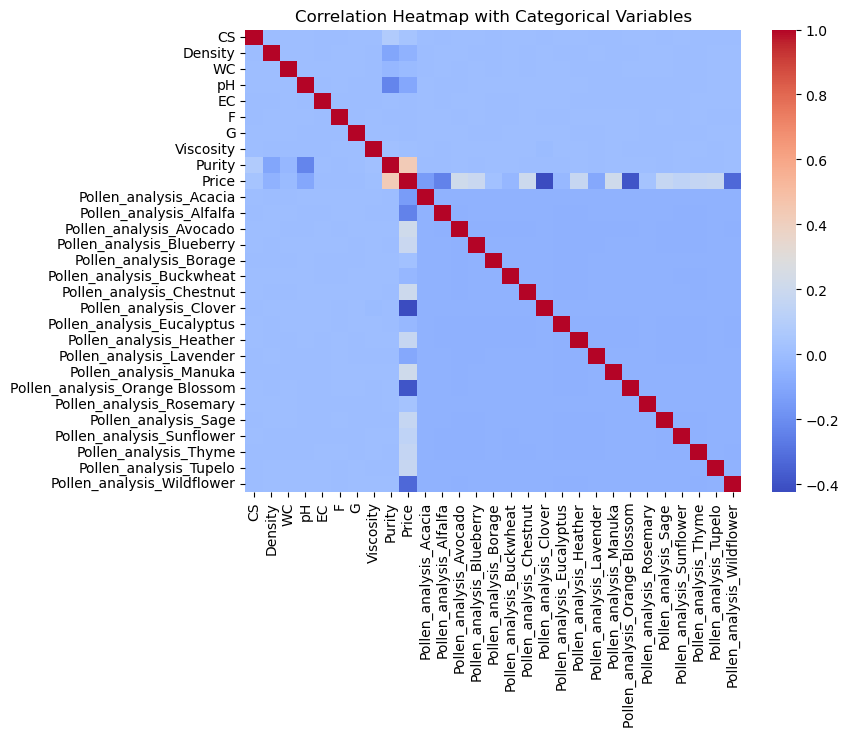

In [19]:
# One-hot encoding of categorical variables
df_encoded = pd.get_dummies(df, columns=['Pollen_analysis'])

# New list of numeric columns including encoded categorical variables
numeric_columns_encoded = df_encoded.columns[df_encoded.dtypes != 'object']

# Calculation of correlation matrix for new numeric variables
correlations_df_encoded = df_encoded[numeric_columns_encoded].corr()

# Create correlation heatmap with new variables
plt.figure(figsize=(8, 6))
sns.heatmap(correlations_df_encoded, cmap='coolwarm', annot=False) # 'annot=True' for annotations, if desired
plt.title('Correlation Heatmap with Categorical Variables')
plt.show()

In the heatmap, there are no obvious strong positive or negative correlations, and most variables appear to have little or no direct correlation with each other. This could mean that the variables are relatively independent of each other, which is generally a good thing for modeling purposes. However, this does not necessarily mean that they have no influence on the target variable; there may be non-linear relationships or interactions between variables that are not captured by a correlation coefficient.

It's important to note that correlation does not mean causation. Even if two variables are correlated, this does not mean that one causes the other. Other analyses, such as causality tests, are required to establish such relationships. Moreover, linear correlation is just one of many possible relationships, and this analysis may require models that capture more complex relationships.

In summary, this heatmap gives an overview of the linear relationships between variables, but it needs to be complemented by other analyses for a complete understanding and to build a robust regression model.

Based on this correlation heatmap, here's what we can conclude:

- **Faible Corrélation Globale :** Si la plupart des coefficients sont proches de zéro (bleu clair dans la heatmap), cela indique qu'il n'y a pas de fortes corrélations linéaires entre la majorité des paires de variables. Cela pourrait signifier que les variables numériques n'ont pas de relations linéaires fortes entre elles.

- **Corrélation Faible entre Prix et Pureté :** Nous pouvons remarquer une faible corrélation entre le prix et la pureté. Cela signifie que, basé sur les données et le calcul linéaire de corrélation, la pureté ne semble pas être un facteur déterminant majeur du prix dans ce dataset. C'est une information importante pour la modélisation car cela suggère que la pureté, en tant que variable isolée, pourrait ne pas fortement influencer la prédiction du prix dans un modèle linéaire.

- **Considérations de Modélisation :** Pour notre modèle de régression, cela implique que nous devrions explorer des modèles qui ne se basent pas uniquement sur des relations linéaires. Par exemple, des modèles non linéaires ou des méthodes de machine learning plus avancées pourraient capturer des relations plus complexes entre les variables.

- **Importance de l'Ingénierie des Caractéristiques :** La faible corrélation entre les variables peut aussi indiquer l'importance de l'ingénierie des caractéristiques (feature engineering). Parfois, la création de nouvelles variables dérivées ou l'interaction entre les variables peut révéler des relations qui n'étaient pas apparentes initialement (exemple : Combinaisons de Variables, Polynomial Features, Groupement ou Binning).

- **Interaction des Variables :** Bien que la corrélation directe entre la pureté et le prix soit faible, cela ne signifie pas nécessairement qu'il n'y a pas de relation. Il est possible que la pureté, en combinaison avec d'autres variables (comme la densité, le pH, ou des facteurs non mesurés dans votre dataset), puisse avoir un impact plus significatif sur le prix. L'analyse de l'interaction entre les variables peut parfois révéler des effets qui ne sont pas apparents lorsqu'on examine les variables de manière isolée.

- **Analyse Multivariable :** Dans le contexte d'une régression linéaire multiple, vous ne vous fiez pas uniquement à une variable à la fois pour prédire votre variable dépendante (dans ce cas, le prix). Vous incluez plusieurs variables indépendantes qui, ensemble, pourraient avoir une meilleure capacité prédictive que chaque variable prise individuellement. Il est donc possible que, même avec une faible corrélation bilatérale, la pureté puisse contribuer de manière significative au modèle lorsque d'autres variables sont également prises en compte.

- **Prudence avec la Multicolinéarité :** Si nous avions observé des corrélations fortes entre certaines variables indépendantes, cela pourrait indiquer la présence de multicollinéarité, qui est une situation où deux ou plusieurs prédicteurs sont fortement liés linéairement. Cela peut rendre l'interprétation de notre modèle plus difficile et peut affecter la précision de l'estimation des coefficients. Cependant, dans notre cas, il semble que la multicollinéarité ne soit pas un problème majeur, étant donné les faibles niveaux de corrélation observés.

- **Corrélation et Causalité :** Il est essentiel de se rappeler que la corrélation ne signifie pas causalité. Même une forte corrélation entre deux variables ne signifie pas que l'une cause l'autre. D'autres analyses, telles que les études longitudinales ou les expériences contrôlées, sont nécessaires pour établir une relation de cause à effet.


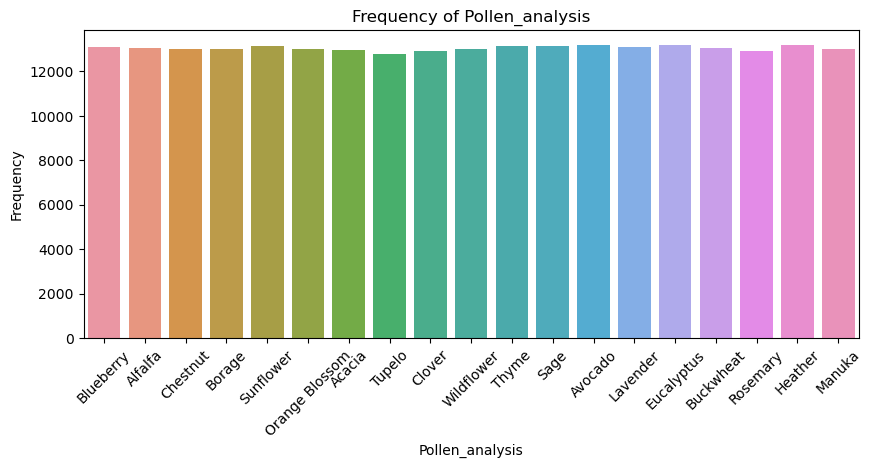

In [21]:
# Bar charts for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

The diagram shows a uniform distribution of pollen types, indicating that no type is over- or under-represented, which is ideal for a balanced analysis of honey in the dataset.

Histograms and box plots are designed to illustrate the distribution and variability of continuous variables, hence incorporating categorical variables into these visualizations is typically not required.

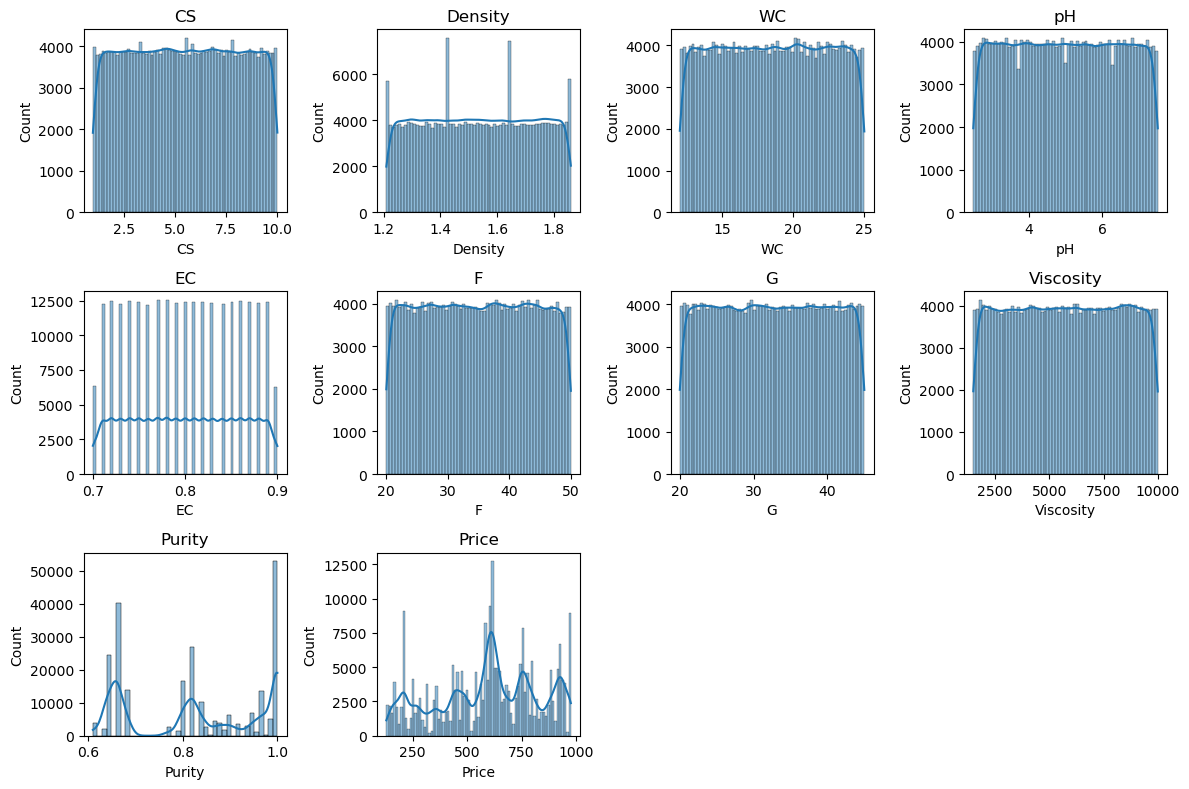

In [24]:
numeric_columns = df.columns[df.dtypes != 'object']

# Distribution of numerical variables
def columns_histplot(df):
    warnings.filterwarnings("ignore")
    plt.figure(figsize=(12, 8))
    
    for i, column in enumerate(numeric_columns):
        plt.subplot(3, 4, i+1)
        sns.histplot(df[column], kde=True)
        plt.title(column)
    
    plt.tight_layout()
    plt.show()
    warnings.filterwarnings("default")
    
columns_histplot(df)

The histograms show that most of the numerical variables have a discrete distribution with distinct peaks, suggesting values measured at fixed intervals or categories. For example, 'Purity' has several sharp peaks, while 'Price' shows a more continuous distribution with a long tail, indicating wider price variations. Some variables such as 'CS', 'EC', 'WC', 'pH', 'F', and 'G' appear to have values clustered or restricted to specific ranges, which may require further investigation to understand the nature of these distributions.

#### 1.4) Outlier management

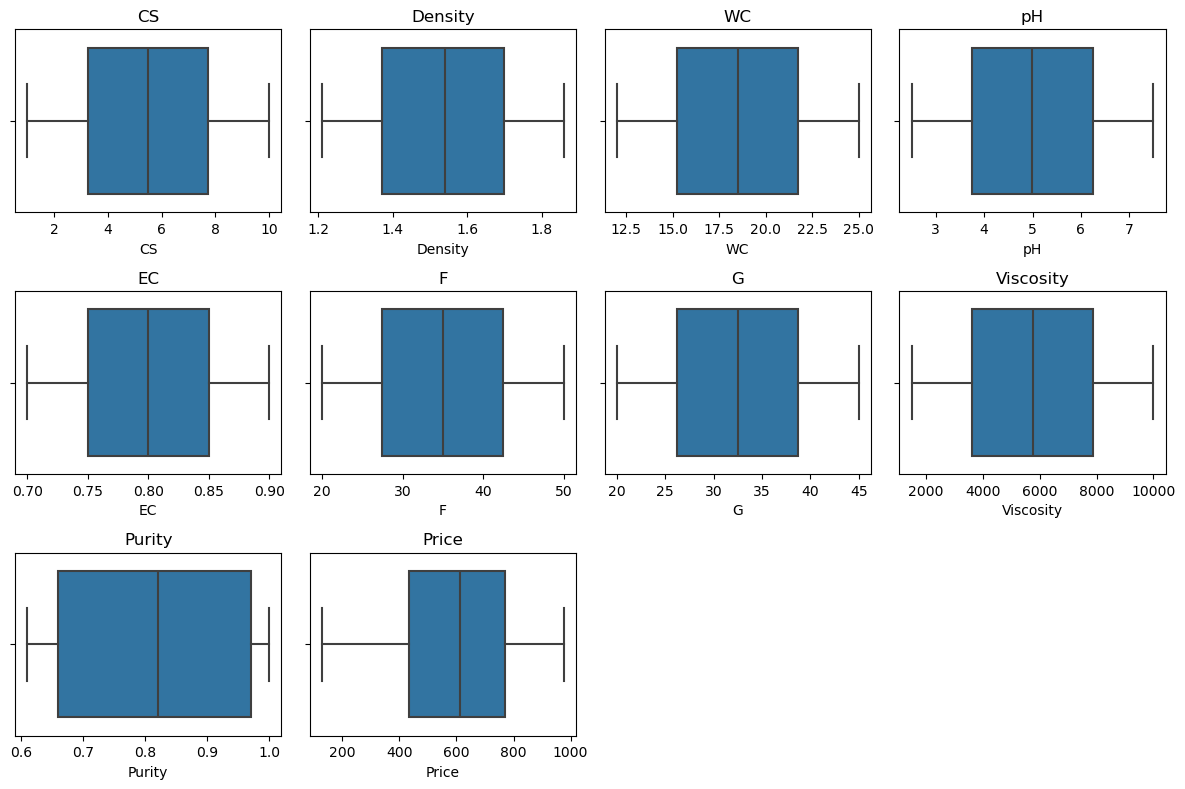

In [27]:
# Moustache boxes for numerical variables (check for Outlier)
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()
warnings.filterwarnings("default")

The code bellow checks the size of the dataset and selects the appropriate normality test based on the size. If the number of observations is greater than 5000, it uses D'Agostino's K-squared test; otherwise, it uses the Shapiro-Wilk test. After the normality test, it proceeds to remove outliers using the method chosen based on the outcome of the normality test (z_score if Normal and IQR otherwise). 

In [29]:
from scipy.stats import normaltest, shapiro, zscore

# Function to test normality using D'Agostino's K-squared test
def test_normality_dagostino(df, columns):
    normality_results = {}
    for column in columns:
        stat, p_value = normaltest(df[column])
        normality_results[column] = 'Normal' if p_value > 0.05 else 'Not Normal'
    print(normality_results)
    return normality_results

# Function to test normality using Shapiro-Wilk test
def test_normality_shapiro(df, columns):
    normality_results = {}
    for column in columns:
        stat, p_value = shapiro(df[column])
        normality_results[column] = 'Normal' if p_value > 0.05 else 'Not Normal'
    print(normality_results)
    return normality_results

# Function to remove outliers
def remove_outliers(df, columns, method='z_score'):
    outliers = pd.DataFrame()
    for column in columns:
        if method == 'z_score':
            zs = zscore(df[column])
            is_outlier = (zs > 3) | (zs < -3)
            outliers = pd.concat([outliers, df[is_outlier]], axis=0)
            df = df[~is_outlier]
        else:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
            outliers = pd.concat([outliers, df[is_outlier]], axis=0)
            df = df[~is_outlier]
    outliers.drop_duplicates(inplace=True)
    return df, outliers

# Select numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Decide which normality test to use based on the number of observations
if df.shape[0] > 5000:
    normality = test_normality_dagostino(df, numeric_cols)
else:
    normality = test_normality_shapiro(df, numeric_cols)

# Decide which method to use for outlier removal based on the normality test results
method = 'z_score' if all(value == 'Normal' for value in normality.values()) else 'iqr'

# Apply the function to remove outliers and capture outliers in a DataFrame
df_clean, df_outliers = remove_outliers(df, numeric_cols, method=method)

# Display the 
print('Outliers:')
df_outliers

{'CS': 'Not Normal', 'Density': 'Not Normal', 'WC': 'Not Normal', 'pH': 'Not Normal', 'EC': 'Not Normal', 'F': 'Not Normal', 'G': 'Not Normal', 'Viscosity': 'Not Normal', 'Purity': 'Not Normal', 'Price': 'Not Normal'}
Outliers:


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price


In [30]:
print(f'{df.shape[0]- df_clean.shape[0]} lines have been deleted')

0 lines have been deleted


**Outliers should not be systematically deleted** until you understand why they appear in the dataset.
Before deciding whether to delete or keep an outlier, ask yourself the following questions:
- Is it due to a measurement or data collection error?
- Is this value possible from a business point of view?
- If I keep this observation, will it benefit my predictive model?

### 1.5) Transformation of categorical variables

To transform categorical variables into numerical variables, we have two main options: One-Hot Encoding and Label Encoding. The choice between these two methods depends on the nature of the categorical variable.
- **One-Hot Encoding** is preferable when the categorical variable has no order or hierarchy. It creates a new column for each unique value of the categorical variable, with 1's to indicate the presence of the category and 0's otherwise.
- **Label Encoding** assigns a unique integer to each unique value of the categorical variable. It is best suited to ordinary categorical variables, where the order of categories is important.

In [33]:
from sklearn.preprocessing import LabelEncoder

def Label_Encoding(df):
    # Creating a LabelEncoder object
    label_encoder = LabelEncoder()
    # Loop over each DataFrame column
    for column in df.columns:
        # If the column is of type object (categorical), we apply Label Encoding
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    return df, numeric_cols

# Perform Label Encoding
df_encoded, numeric_cols = Label_Encoding(df_clean)
df_encoded.head(3)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6,6883.60,0.66,639.64


In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  int32  
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), int32(1)
memory usage: 19.9 MB


## 2) Creation of train and test datasets

In [36]:
from sklearn.model_selection import train_test_split

# Separation of features and target
X = df_encoded.drop('Price', axis=1) # This removes the target column from the DataFrame to create a set of features
y = df_encoded['Price'] # This selects the target column

# Division of data into training and test sets
# The 'test_size' parameter determines the proportion of the test set. For example, 0.2 means that 20% of the data is used for testing.
# The 'random_state' parameter ensures the reproducibility of your division. You can use any integer.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=None) # stratify=y 

In [37]:
X_train.head(3)

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity
83679,5.58,1.80,12.78,5.95,0.78,47.99,40.68,9,2985.59,0.95
221967,6.89,1.70,16.84,5.82,0.86,45.53,39.18,3,9337.61,1.00
98222,5.57,1.86,19.23,6.27,0.85,47.76,33.14,11,9162.63,0.97


In [38]:
print('Target:\n',y_train.head(3))

Target:
 83679     877.16
221967    946.46
98222     949.32
Name: Price, dtype: float64


## 3) Transformation : Normalisation or Standardisation 

Normalization and standardization are two data pre-processing techniques that scale numerical features in a dataset before using them to train a machine learning model. These steps are crucial, as they ensure that variables are on an equal footing and that the model is not biased in favor of features with a larger scale.

**Normalization (Min-Max Scaling)**  
Normalization adjusts data so that values lie between 0 and 1. It is useful when you know that the data distribution is not Gaussian, or when you need fixed bounds for your data.

**Standardization (Z-Score Normalization)**  
Standardization resizes data to have a mean of 0 and a standard deviation of 1. It is less sensitive to outliers than normalization and is useful when data follow a normal distribution.

**Choosing the technique**  
To decide which technique to use, examine the distribution of your data. If the data follow a normal distribution, standardization is generally preferable. If the data have different scales and no Gaussian distribution, normalization may be more appropriate.

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Function to select transformer according to data distribution
def Transformer_selection(normal_distribution=True):
    if normal_distribution:
        scaler = StandardScaler() # Standardize for normal distributions
        print('Standardization')
    else:
        scaler = MinMaxScaler()   # Normalization for other distributions
        print('Normalization')
    return scaler

# Scaler selection based on data distribution
scaler = Transformer_selection(normal_distribution=False)

# Scaling of training data only, then transformation of training and test sets
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Update DataFrames with scaled data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Normalization


In [41]:
X_train_scaled_df.describe() # check that the average is close to 0.5 if Normalisation and 0 is Standardisation

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity
count,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000
mean,0.499633,0.501170,0.500533,0.499165,0.499517,0.498668,0.500021,0.499155,0.500647,0.550002
std,0.288289,0.288905,0.288356,0.288923,0.289646,0.288454,0.289095,0.304149,0.288765,0.357496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.246154,0.250769,0.248000,0.250000,0.248333,0.249200,0.222222,0.251124,0.128205
50%,0.500000,0.507692,0.501538,0.498000,0.500000,0.498667,0.500000,0.500000,0.500892,0.538462
75%,0.748889,0.753846,0.750769,0.750000,0.750000,0.748333,0.750400,0.777778,0.751104,0.923077
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
y_train.describe() 

count    198322.000000
mean        595.105951
std         233.601305
min         128.720000
25%         433.000000
50%         612.960000
75%         771.330000
max         976.690000
Name: Price, dtype: float64

In [43]:
df_encoded['Price'].describe() 

count    247903.000000
mean        594.807644
std         233.627972
min         128.720000
25%         433.000000
50%         612.960000
75%         770.220000
max         976.690000
Name: Price, dtype: float64

## 4) Linearity check

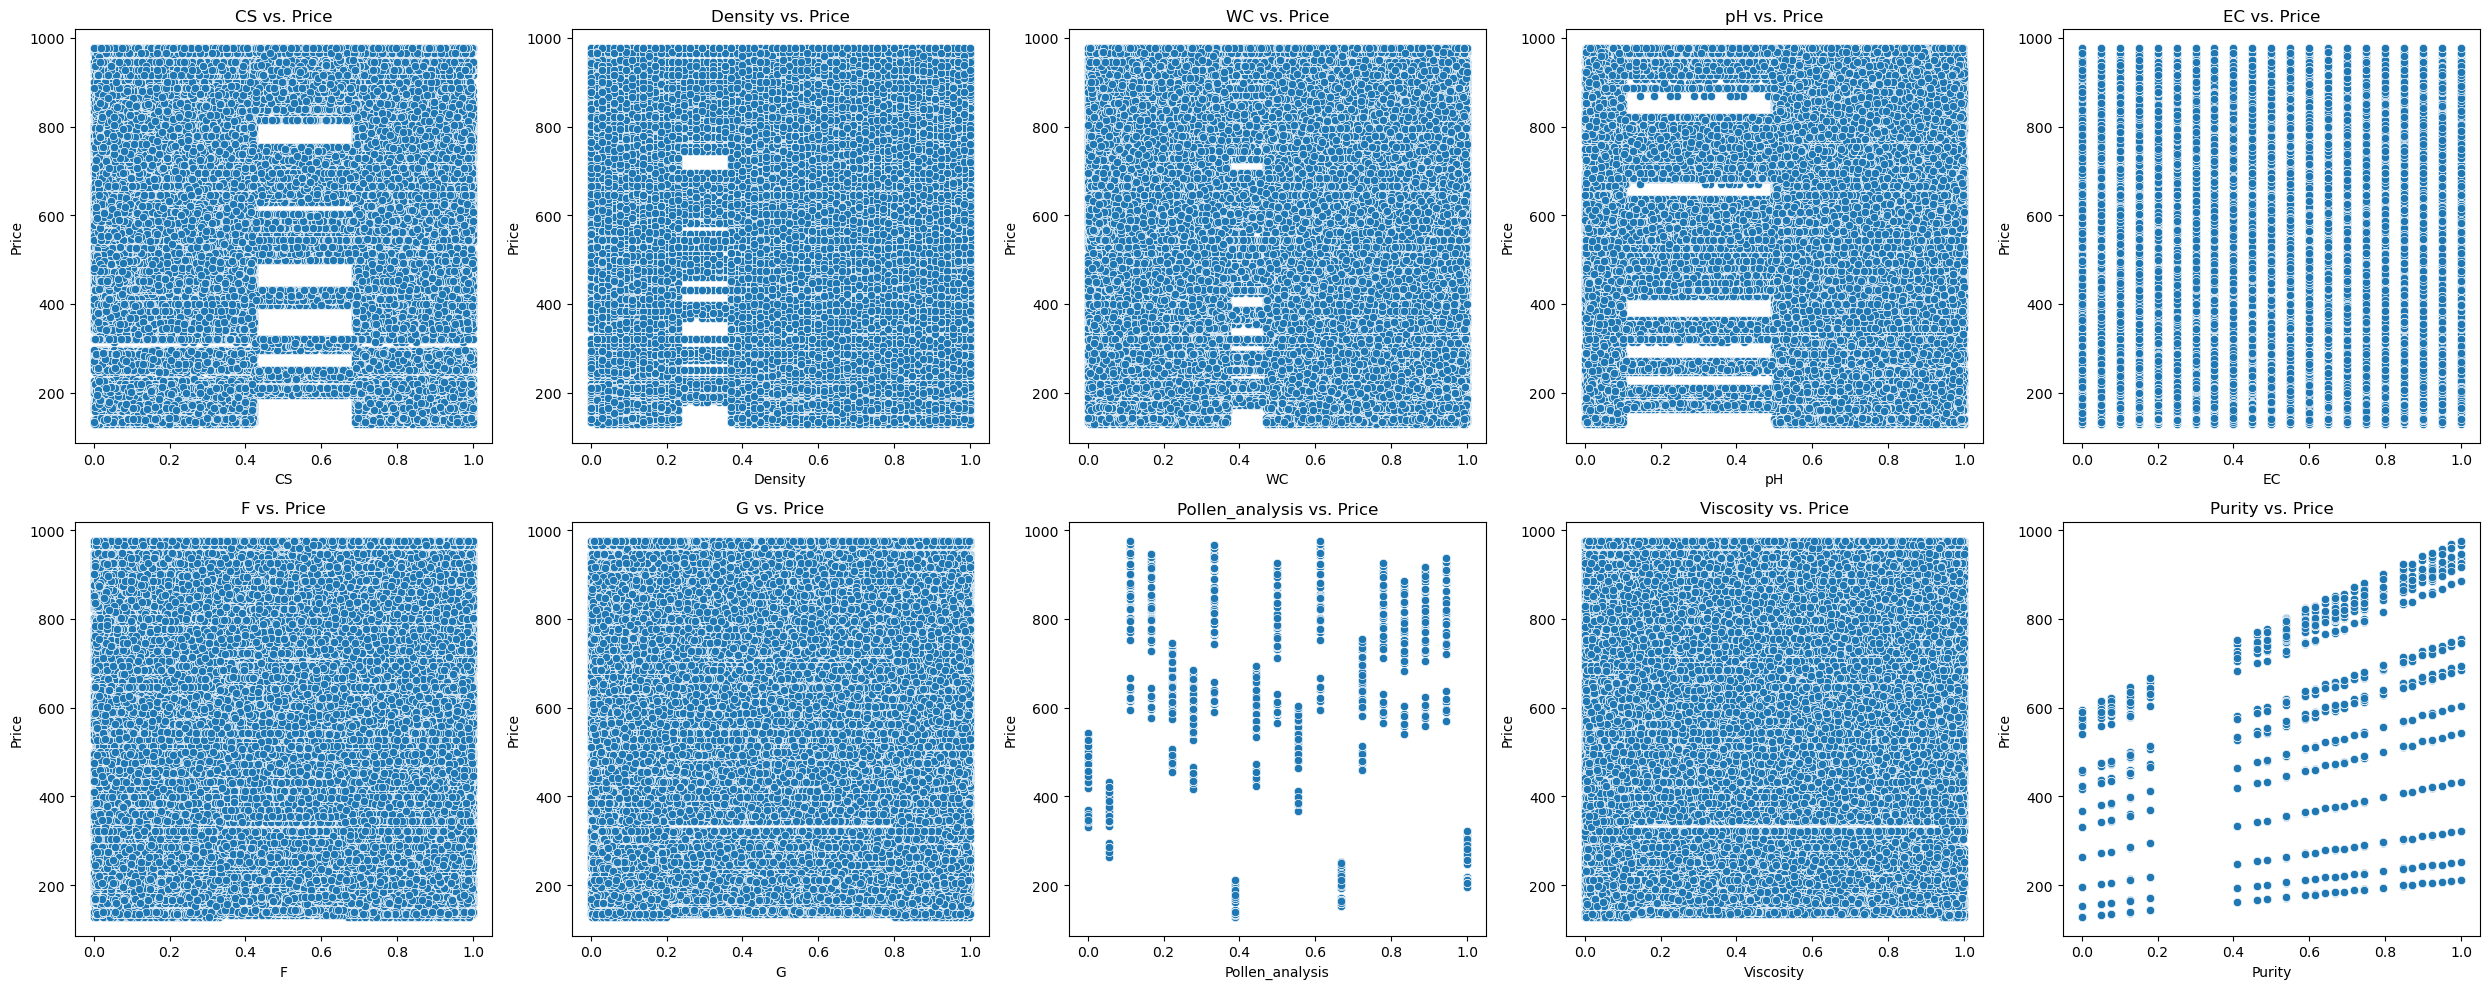

In [45]:
# Number of features
num_features = X_train_scaled_df.shape[1]

# Determine number of rows and columns for subgraphs
num_columns = 5 # For example, to have three columns of graphics
num_rows = num_features // num_columns + (num_features % num_columns > 0)

# Create a large figure for all subgraphs
plt.figure(figsize=(num_columns * 5, num_rows * 5))
warnings.filterwarnings("ignore")
for i, feature in enumerate(X_train_scaled_df.columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.scatterplot(x=X_train_scaled_df[feature], y=y_train)
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

# Adjust spacing between graphics for better readability
plt.tight_layout()
plt.show()
warnings.filterwarnings("default")

When interpreting scatter graphs to assess linearity, we're looking for a clear trend or relationship between each characteristic and the target variable. Here's what you should consider:

- **Linear relationship**: If the points on the scatter graph appear to follow a straight line, even if it's not perfect, this indicates a linear relationship. The closer the points are to a potential straight line, the stronger the relationship.

- **Non-linear relationship**: If the points form a pattern that is not a straight line (e.g. U-shaped curve, exponential), the relationship is non-linear.

- **Absence of Relationship**: If the points appear to be randomly dispersed, with no discernible pattern, this may indicate an absence of linear relationship.

- **Clusters**: Distinct groupings of points may indicate a non-linear relationship or the presence of sub-groups in the data.

=> On the graphs, the pollen_analysis, EC and purity characteristics show more orderly aligned points, which could indicate a linear relationship with price.

To confirm our visual observations, we'll calculate the correlation coefficient for each feature in relation to the target variable. A correlation coefficient close to +1 or -1 indicates a strong linear relationship, while a coefficient close to 0 indicates no linear relationship.

In [47]:
correlation_matrix = pd.concat([X_train_scaled_df, y_train], axis=1).corr()
print(correlation_matrix['Price'])

CS                 0.034330
Density           -0.050247
WC                -0.013266
pH                -0.101185
EC                 0.000468
F                 -0.003697
G                 -0.004516
Pollen_analysis    0.058990
Viscosity          0.010315
Purity             0.432867
Price              1.000000
Name: Price, dtype: float64



Here's how to interpret some of our results:

- **Purity**: With a coefficient of 0.432867, there is a moderate positive correlation with Price. This suggests that purity is relatively well associated with rising honey prices. This is probably the most significant characteristic of those you have listed.
- **pH**: With a coefficient of -0.101185, there is a weak negative correlation with Price. This means that as pH increases, the price of honey tends to decrease slightly.
- **Density**: With a coefficient of -0.050247, the correlation is weak and negative with Price.
For the other characteristics, the values are very close to zero, indicating that there is little or no direct linear correlation with Price.

As far as linear regression is concerned, features with higher correlation coefficients are better candidates for inclusion in the model, as they have a stronger relationship with the target variable. However, correlation alone does not determine causality, and it is possible that a feature with a low correlation will still have a significant effect on the Price when combined with other features.

It is also important to consider multicollinearity when selecting features for the regression model. If two features are highly correlated with each other, this can distort the interpretation of individual effects on the target variable, and potentially lead to problems of instability in the model's coefficient estimates.

## 5) Training of initial linear regression model (baseline)

Start by training a simple linear regression model without any polynomial transformations or regularizations to establish a performance benchmark.

Predictions are made on the test set (X_test) and the root mean square error (RMSE) between the predictions and the true values of the test set (y_test) is calculated. A lower value of RMSE indicates better performance.

#### Simple with LinearRegression :

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create model instance
model_baseline = LinearRegression()

# Train model with scaled training data
model_baseline.fit(X_train_scaled, y_train)

# Prediction on test set
y_pred_baseline = model_baseline.predict(X_test_scaled)

# Calculation of performance metrics
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

# Display performance metrics
print(f"MSE (Baseline): {mse_baseline:.3f}")
print(f"R^2 (Baseline): {r2_baseline:.3f}")


MSE (Baseline): 44298.824
R^2 (Baseline): 0.189


#### More advanced with SGDRegressor : 
The advantage of getting started with SGDRegressor is that you can easily adjust hyperparameters such as learning rate (eta0), learning rate program (learning_rate), and introduce regularization (penalty with l1, l2, or elasticnet) when using RAY Tune for optimization. This offers considerable flexibility in finding the optimum configuration for our model

In [53]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Création de l'instance du modèle SGDRegressor
# Vous pouvez commencer avec les paramètres par défaut et les ajuster plus tard avec RAY Tune
sgd_baseline = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=25)

# Entraînement du modèle avec les données d'entraînement mises à l'échelle
sgd_baseline.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred_sgd = sgd_baseline.predict(X_test_scaled)

# Calcul des métriques de performance
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Affichage des métriques de performance
print(f"MSE (SGD Baseline): {mse_sgd:.3f}")
print(f"R^2 (SGD Baseline): {r2_sgd:.3f}")

MSE (SGD Baseline): 44299.634
R^2 (SGD Baseline): 0.189


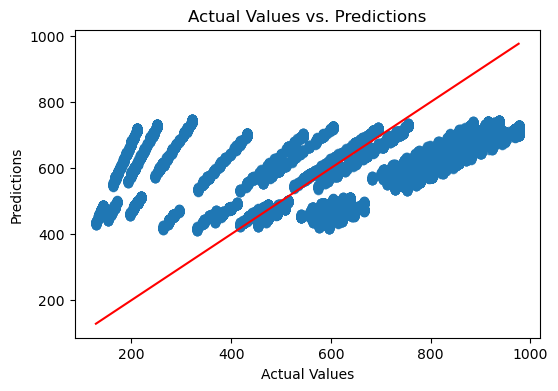

In [54]:
# Graphical display of predictions vs. actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_sgd, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Actual Values vs. Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Ideal line
plt.show()

This graph shows where the predictions lie in relation to the actual values. If the predictions were perfect, they would all lie on the identity line (the dotted line). Deviations from this line indicate prediction errors.

## 6) Feature Engineering
Feature engineering is the process of creating new variables (features) from existing data that can help improve model performance. New variables can be created by creatively combining existing variables, or by extracting additional information.

Some ideas for feature engineering:
- **Interaction between variables**: Generate new features by multiplying two or more variables, to capture the combined effect on the target variable.
- **Polynomial Features**: Use polynomial features, especially if you suspect that the relationships between dependent and independent variables are not linear.
- **Domain-based variables**: Integrate your domain understanding to create specific variables that may be relevant to the problem at hand, such as industry-specific indicators or expertise-based classifications.

#### 6.1) Polynomial Features
We will apply a Polynomial Features transformation to our dataset. This technique is crucial for capturing non-linear relationships between the features and the target variable. By including polynomial terms, we can model interactions between different features and improve the predictive power of our linear model.

The sklearn.preprocessing.PolynomialFeatures class is used for this purpose. It generates a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree. For example, if an input sample is two-dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

This polynomial transformation approach can considerably increase the number of features in your dataset, especially with a high degree and a large number of initial variables. This can lead to an increase in model complexity and the risk of over-fitting. Make sure you assess the usefulness of these new features and apply feature selection or regularization techniques to manage model complexity.


In [58]:
from sklearn.preprocessing import PolynomialFeatures

# Choose the degree of the polynomial. A degree of 2 may be a good starting point.
poly_degree = 2

# Initialize PolynomialFeatures tool
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)

# Apply the transformation to your training data
X_train_poly = poly_features.fit_transform(X_train_scaled_df)

# Apply the same transformation to your test data
X_test_poly = poly_features.transform(X_test_scaled_df)

# If necessary, convert results to DataFrame for easier reading
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_features.get_feature_names_out(input_features=X_train_scaled_df.columns))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_features.get_feature_names_out(input_features=X_test_scaled_df.columns))

print("Original features:", X_train_scaled_df.shape[1])
print("Features after polynomial transformation:", X_train_poly_df.shape[1])

Original features: 10
Features after polynomial transformation: 65


In [59]:
X_train_poly_df.describe()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,...,G^2,G Pollen_analysis,G Viscosity,G Purity,Pollen_analysis^2,Pollen_analysis Viscosity,Pollen_analysis Purity,Viscosity^2,Viscosity Purity,Purity^2
count,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,...,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000,198322.000000
mean,0.499633,0.501170,0.500533,0.499165,0.499517,0.498668,0.500021,0.499155,0.500647,0.550002,...,0.333596,0.249483,0.250391,0.275011,0.341662,0.249854,0.274887,0.334032,0.276684,0.430305
std,0.288289,0.288905,0.288356,0.288923,0.289646,0.288454,0.289095,0.304149,0.288765,0.357496,...,0.298486,0.227397,0.220763,0.258167,0.314780,0.227287,0.267950,0.298264,0.259814,0.393919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.246154,0.250769,0.248000,0.250000,0.248333,0.249200,0.222222,0.251124,0.128205,...,0.062101,0.060622,0.067522,0.064492,0.049383,0.060992,0.055556,0.063063,0.061510,0.016437
50%,0.500000,0.507692,0.501538,0.498000,0.500000,0.498667,0.500000,0.500000,0.500892,0.538462,...,0.250000,0.183089,0.187460,0.176185,0.250000,0.183406,0.166667,0.250893,0.176185,0.289941
75%,0.748889,0.753846,0.750769,0.750000,0.750000,0.748333,0.750400,0.777778,0.751104,0.923077,...,0.563100,0.384400,0.383293,0.439200,0.604938,0.385597,0.444444,0.564157,0.446325,0.852071
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.997614,1.000000,1.000000,0.999933,1.000000,1.000000,0.999984,1.000000


#### 6.2) Re-evaluation

In [61]:
# Make sure y_train is correctly aligned with X_train_poly_df. If y_train has not been modified since its creation, its index should already be correct.
# However, if you have any doubts or have manipulated the indexes, you can reset them to be sure.
# Note: This is only necessary if the indexes are not already aligned.
y_train_reset = y_train.reset_index(drop=True)

# Concatenate X_train_poly_df with y_train_reset to include polynomial features and target variable
X_train_poly_with_target = pd.concat([X_train_poly_df, y_train_reset], axis=1)

# Calculation of new correlation matrix including polynomial features and target variable
correlation_matrix_poly = X_train_poly_with_target.corr()

In [62]:
# Display correlations with 'Price', sorted in descending order to better see the most correlated features
correlation_matrix_poly['Price'].sort_values(ascending=False).head(20)

Price                        1.000000
Purity                       0.432867
Purity^2                     0.421176
CS Purity                    0.343510
Pollen_analysis Purity       0.328549
Viscosity Purity             0.302803
WC Purity                    0.299040
EC Purity                    0.297250
G Purity                     0.296789
F Purity                     0.295201
pH Purity                    0.285916
Density Purity               0.285781
CS Pollen_analysis           0.062054
Pollen_analysis              0.058990
Pollen_analysis Viscosity    0.046027
EC Pollen_analysis           0.037792
F Pollen_analysis            0.036635
G Pollen_analysis            0.035000
CS                           0.034330
Pollen_analysis^2            0.033423
Name: Price, dtype: float64

## 7) Characteristic transformation

Characteristic transformation aims to apply mathematical transformations to variables to improve their distribution or relationship with the target variable.

To choose the most appropriate transformation, start by examining the distribution of your data:
 - Skewness: If your data are skewed, consider a transformation (logarithmic, square root, inverse) to reduce this skewness.
 - Variance: If the variance of your data is uneven, consider transformations such as Box-Cox or Yeo-Johnson to stabilize it.
 - Value range: If your algorithms are sensitive to data scale (such as k-NN or neural networks), standardization or normalization may be necessary.
Perform visual (histograms, Q-Q plots) and statistical (Shapiro-Wilk test for normality, Levene test for equality of variances) tests before and after transformations to assess their effectiveness. Finally, the choice may also depend on the specific requirements of your model or application domain.
s of the input features.

Here is a summary of the main transformations used in data preparation for modelling: 

**Polynomial Transformation:**
 - Utility: Expands the feature space by considering polynomial terms of features, allowing the model to capture nonlinear relationships.
 - When to Use: If you suspect that the relationship between dependent and independent variables is not linear, incorporating polynomial features can help model these complexities.

**Logarithmic Transformation:**
 - Utility: Reduces skewness in positively skewed distributions. Improves linearity between variables.
 - When to Use: Check the skewness of your data. If they are positively skewed, consider this transformation.
   
**Square Root Transformation:**
 - Utility: Also reduces skewness, but less drastically than logarithmic transformation.
 - When to Use: Can be used as an alternative to logarithmic transformation, especially when data includes zeros.
   
**Box-Cox Transformation:**
 - Utility: Stabilizes variance and normalizes the distribution of data. Requires that data are strictly positive.
 - When to Use: If your data are positive but do not respond well to logarithmic or square root transformations, try Box-Cox.
   
**Yeo-Johnson Transformation:**
 - Utility: Similar to Box-Cox but applicable to both negative and positive data.
 - When to Use: If you have both negative and positive data and seek to stabilize variance, the Yeo-Johnson transformation is a good option.
   
**Inverse or Reciprocal Transformation:**
 - Utility: Inverts the values of features. Useful for distributions with a marked positive skew.
 - When to Use: If logarithmic transformation is not sufficient to reduce skewness, consider the inverse transformation.
   
**Exponential Transformation:**
 - Utility: The inverse of logarithmic transformation. Useful for data with a negative skew.
 - When to Use: Use it when your data show a negative skewness and you wish to normalize them.
   
**Standardization / Normalization:**
 - Utility: Adjusts the scale of features so that data are centered around zero (standardization) or between 0 and 1 (normalization).
 - When to Use: Standardization is often used when algorithms assume that data are centered (such as in SVMs or regularized regressions). Normalization is useful when working with algorithms sensitive to the scale of attributes, such as k-NN or neural networks.
   

Each of these transformations can be strategically selected based on the specific characteristics of your data and the requirements of your modeling approach. The goal is to improve the model's performance by enhancing the quality and the representativeness of the input features.

## 8) Regularization

Regularization is a fundamental technique in machine learning to prevent over-fitting and promote generalization of models on unseen data. It is particularly useful in regression models where the risk of over-fitting is high, especially when the number of features is large compared to the number of observations. Regularization methods such as Ridge and Lasso add a penalty term to the usual cost function of a linear regression model, forcing the model weights to remain small.

**Ridge Regression**  
Ridge regression (also known as L2 regularization) adds the sum of the squares of the coefficients multiplied by a penalty parameter alpha as a penalty term to the cost function. This penalty term pushes the coefficients to reduce in size. The choice of alpha influences the strength of the penalty; higher values mean a stronger penalty.

**Lasso Regression**  
Lasso regression (L1 regularization) adds the sum of the absolute values of the coefficients multiplied by a penalty parameter alpha to the cost function. Unlike Ridge, Lasso can reduce some coefficients to exactly zero, making it a useful method for variable selection in addition to regularization.


Regularization is a powerful tool for improving the generalization of linear regression models. **In practice, the choice between Ridge and Lasso may depend on the structure of your dataset and whether you need both regularization and feature selection (in which case Lasso may be preferable).**

**Choice of alpha**  
**The choice of alpha parameter is crucial to model performance. Too high an alpha may lead to under-fitting, while too low an alpha may not be sufficient to control over-fitting. Using techniques such as cross-validation (e.g. RidgeCV or LassoCV in Scikit-Learn) can help to find a good value for alpha.**

#### 8.1) Re-evaluation

In [68]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# SGDRegressor initialization with L2 regularization
sgd_reg_poly = SGDRegressor(penalty='l1', alpha=100, # Adjust alpha according to desired level of regularization
                            max_iter=100000, tol=1e-3, random_state=25)

# Model training on data with polynomial features
sgd_reg_poly.fit(X_train_poly, y_train)

# Prediction on transformed test set
y_pred_poly = sgd_reg_poly.predict(X_test_poly)

# Calculation of performance indicators
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"MSE (Mean squared error regression loss) with polynomial characteristics and L2: {mse_poly:.3f}, R^2 (coefficient of determination): {r2_poly:.3f}")

MSE (Mean squared error regression loss) with polynomial characteristics and L2: 54643.040, R^2 (coefficient of determination): -0.000


This model is not as good as the baseline.

## 9) Coss Validation
Cross-validation is a technique used to evaluate the performance of a predictive model in a more robust way. It works by dividing the data set into several subsets (or "folds"). The model is then trained several times, each time using a different subset as the test set and the rest of the data as the training set.

In [73]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Data preparation with PolynomialFeatures
poly_degree = 2 # Select polynomial degree
poly_transformer = PolynomialFeatures(degree=poly_degree, include_bias=False)

# Initialize SGDRegressor model with L2 regularization
sgd_reg = SGDRegressor(penalty='l2', alpha=0.01, # alpha is the regularization term, to be adjusted as required
                       max_iter=1000, tol=1e-3, random_state=25)

# Creation of a pipeline to sequentially transform data and apply the model
pipeline = make_pipeline(poly_transformer, sgd_reg)

# Definition of the score to be used for cross-validation, here MSE (Mean Squared Error)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Application of cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=mse_scorer) # cv is the number of folds

# Calculation of mean and standard deviation of cross-validation scores
scores_mean = np.mean(scores)
scores_std = np.std(scores)

print(f"Mean MSE of the cross-validation: {scores_mean}, with a standard deviation of {scores_std}")

Mean MSE of the cross-validation: -3.359275478399361e+46, with a standard deviation of 3.3628163849971745e+46


This model is not as good as the baseline.  
**We'll try to find a better multiple linear regression model with Ray Tune.**

## 10) Experiment execution and hyperparameter tuning with Ray Tune

Let's create a complete, professional version of your Ray Tune code to optimize the hyperparameters of a multiple linear regression model, using SGDRegressor with tracking via TensorBoard, including various data preprocessing steps such as standardization, and testing different regularizations (L1, L2, ElasticNet).

We will prepare the data pipeline, configure Ray Tune to optimize several hyperparameters and regularizations, and finally integrate tracking with TensorBoard to visualize the performance of the different tests.

#### Step 1: Data preparation

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# DataFrame loading
# df_encoded = pd.read_csv('your_dataset.csv')

# Separation of features and target
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Division into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Application of polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

#### Step 2: Setting up Ray Tune and hyperparameter search (=> LIBRARY ERROR)

In [79]:
'''import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.tune import CLIReporter

def train_model(config):
    model = SGDRegressor(penalty=config["penalty"],
                         alpha=config["alpha"],
                         l1_ratio=config.get("l1_ratio", 0.15),  # # Used only if penalty is 'elasticnet'.
                         learning_rate='constant',
                         eta0=config["eta0"],
                         max_iter=1000,
                         tol=1e-3,
                         random_state=42)
    model.fit(X_train_poly, y_train)
    predictions = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, predictions)
    tune.report(mse=mse)

search_space = {
    "penalty": tune.choice(["l2", "l1", "elasticnet"]),
    "alpha": tune.loguniform(1e-5, 1e-1),
    "eta0": tune.loguniform(1e-4, 1e-1),
    "l1_ratio": tune.quniform(0, 1, 0.01)  # Used for 'elasticnet'
}

scheduler = ASHAScheduler(metric="mse", mode="min", max_t=100, grace_period=10, reduction_factor=2)
reporter = CLIReporter(metric_columns=["mse", "training_iteration"])

result = tune.run(
    train_model,
    resources_per_trial={"cpu": 1},
    config=search_space,
    num_samples=10,
    scheduler=scheduler,
    progress_reporter=reporter,
    name="tune_sgd_regressor")

best_trial = result.get_best_trial("mse", "min", "last")
print(f"Meilleur essai: {best_trial.config}")
print(f"Meilleur MSE obtenu: {best_trial.last_result['mse']}")'''

'import pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler, PolynomialFeatures\nfrom sklearn.linear_model import SGDRegressor\nfrom sklearn.metrics import mean_squared_error\nfrom ray import tune\nfrom ray.tune.schedulers import ASHAScheduler\nfrom ray.tune import CLIReporter\n\ndef train_model(config):\n    model = SGDRegressor(penalty=config["penalty"],\n                         alpha=config["alpha"],\n                         l1_ratio=config.get("l1_ratio", 0.15),  # # Used only if penalty is \'elasticnet\'.\n                         learning_rate=\'constant\',\n                         eta0=config["eta0"],\n                         max_iter=1000,\n                         tol=1e-3,\n                         random_state=42)\n    model.fit(X_train_poly, y_train)\n    predictions = model.predict(X_test_poly)\n    mse = mean_squared_error(y_test, predictions)\n    tune.report(mse=mse)\n\nsearch_space = {\n    "penalty":

In [80]:
'''from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def train_model(config):
    # Initialize model with hyperparameters
    model = SGDRegressor(penalty=config["penalty"],
                         alpha=config["alpha"],
                         l1_ratio=config.get("l1_ratio", 0.15), # Used only if penalty is 'elasticnet'
                         learning_rate='constant',
                         eta0=config["eta0"],
                         max_iter=1000,
                         tol=1e-3,
                         random_state=42)
    
    # Model training
    model.fit(X_train_poly, y_train)
    
    # Model evaluation
    predictions = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, predictions)
    
    # Send MSE score to Ray Tune
    tune.report(mse=mse)

# Configure hyperparameters to be tested
search_space = {
    "penalty": tune.choice(["l2", "l1", "elasticnet"]),
    "alpha": tune.loguniform(1e-5, 1e-1),
    "eta0": tune.loguniform(1e-4, 1e-1),
    "l1_ratio": tune.quniform(0, 1, 0.01) # Used only if penalty is 'elasticnet'.
}


# Scheduler and reporter configuration
scheduler = ASHAScheduler(
    metric="mse",
    mode="min",
    max_t=100,
    grace_period=10,
    reduction_factor=2)

reporter = CLIReporter(
    metric_columns=["mse", "training_iteration"])

# TensorBoard configuration for tracking
from ray.tune.logger import DEFAULT_LOGGERS
from ray.tune.integration.tensorboard import TensorBoardLogger

# Start hyperparameter search
result = tune.run(
    train_model,
    resources_per_trial={"cpu" : 1},
    config=search_space,
    num_samples=10,
    scheduler=scheduler,
    progress_reporter=reporter,
    loggers=DEFAULT_LOGGERS + (TensorBoardLogger,),
    name="tune_sgd_regressor")

# Best hyperparameters
best_trial = result.get_best_trial("mse", "min", "last")
print(f "Best trial: {best_trial.config}")
print(f "Best MSE obtained: {best_trial.last_result['mse']}")"'''


'from ray import tune\nfrom ray.tune import CLIReporter\nfrom ray.tune.schedulers import ASHAScheduler\nfrom sklearn.linear_model import SGDRegressor\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\n\ndef train_model(config):\n    # Initialize model with hyperparameters\n    model = SGDRegressor(penalty=config["penalty"],\n                         alpha=config["alpha"],\n                         l1_ratio=config.get("l1_ratio", 0.15), # Used only if penalty is \'elasticnet\'\n                         learning_rate=\'constant\',\n                         eta0=config["eta0"],\n                         max_iter=1000,\n                         tol=1e-3,\n                         random_state=42)\n    \n    # Model training\n    model.fit(X_train_poly, y_train)\n    \n    # Model evaluation\n    predictions = model.predict(X_test_poly)\n    mse = mean_squared_error(y_test, predictions)\n    \n    # Send MSE score to Ray Tune\n    tune.report(mse=mse)\n\n# Configure hyperp

# PERFORMANCE OPTIMIZATION IN REGRESSION: FROM DECISION TREE TO GRADIENT BOOSTING

### Decision Tree Regressor

In [83]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2)

dt_reg.fit(X_train_scaled, y_train)

train_predict_dt = dt_reg.predict(X_train_scaled)
test_predict_dt = dt_reg.predict(X_test_scaled)

dt_train_r2 = r2_score(y_train, train_predict_dt)
dt_test_r2 = r2_score(y_test, test_predict_dt)
mse_train_dt = mean_squared_error(y_train, train_predict_dt)
mse_test_dt = mean_squared_error(y_test, test_predict_dt)

# Results
print('Test MSE:', mse_test_dt)
print('Train MSE:', mse_train_dt)
print('Decision Tree Regressor Model Accuracy Train:', dt_train_r2 * 100, '%')
print('Decision Tree Regressor Model Accuracy Test:', dt_test_r2 * 100, '%')

Test MSE: 24562.27215808917
Train MSE: 24579.663762231394
Decision Tree Regressor Model Accuracy Train: 54.95697002494382 %
Decision Tree Regressor Model Accuracy Test: 55.0389288306669 %


### Gradient Boosting Regressor

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

#Predict
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

#  MSE ve R-2
mse_train_gbr = mean_squared_error(y_train, y_pred_train_gbr)
mse_test_gbr = mean_squared_error(y_test, y_pred_test_gbr)
r2_train_gbr = r2_score(y_train, y_pred_train_gbr)
r2_test_gbr = r2_score(y_test, y_pred_test_gbr)

print('Gradient Boosting Regressor Model:')
print('Train MSE:', mse_train_gbr)
print('Test MSE:', mse_test_gbr)
print('Train R2:', r2_train_gbr)
print('Test R2:', r2_test_gbr)

Gradient Boosting Regressor Model:
Train MSE: 555.1897855100884
Test MSE: 559.0709569987941
Train R2: 0.989825967355582
Test R2: 0.9897662443748911


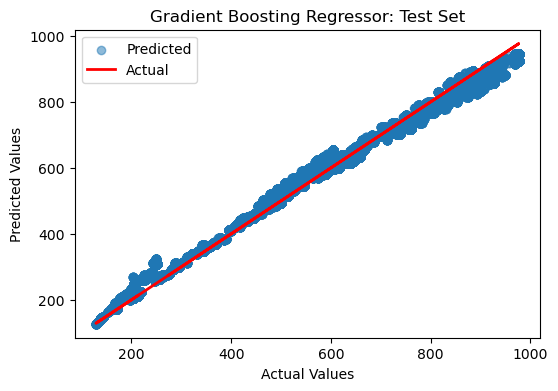

In [86]:
import matplotlib.pyplot as plt

# Plotting the real vs predicted values for training and test sets
plt.figure(figsize=(6, 4))

# Test set real vs predicted
plt.scatter(y_test, y_pred_test_gbr, alpha=0.5, label='Predicted')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Actual')  # Ideal line where predicted = actual
plt.title('Gradient Boosting Regressor: Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()

##### The XGBoost model has the best prediction with an R² of 98.9% and a small margin of error (MSE=559).